Source code: https://github.com/ndang01/ndang01.github.io/blob/main/posts/blog4/LinearRegression.py

# Creating the testing and validation data

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def pad(X):
    return np.append(X, np.ones((X.shape[0], 1)), 1)

def LR_data(n_train = 100, n_val = 100, p_features = 1, noise = .1, w = None):
    if w is None: 
        w = np.random.rand(p_features + 1) + .2
    
    X_train = np.random.rand(n_train, p_features)
    y_train = pad(X_train)@w + noise*np.random.randn(n_train)

    X_val = np.random.rand(n_val, p_features)
    y_val = pad(X_val)@w + noise*np.random.randn(n_val)
    
    return X_train, y_train, X_val, y_val

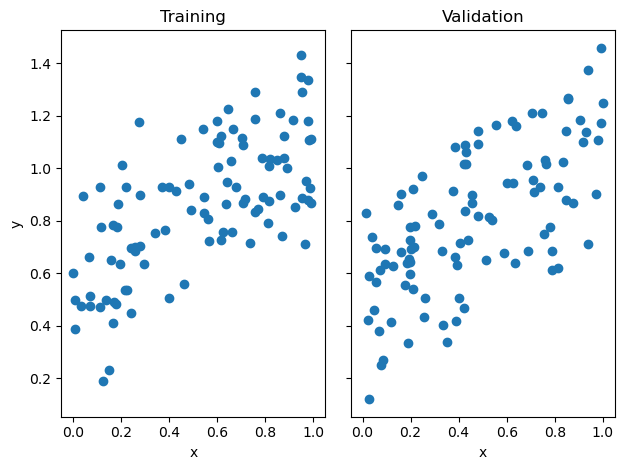

In [2]:
n_train = 100
n_val = 100
p_features = 1
noise = 0.2

# create some data
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

# plot it
fig, axarr = plt.subplots(1, 2, sharex = True, sharey = True)
axarr[0].scatter(X_train, y_train)
axarr[1].scatter(X_val, y_val)
labs = axarr[0].set(title = "Training", xlabel = "x", ylabel = "y")
labs = axarr[1].set(title = "Validation", xlabel = "x")
plt.tight_layout()
plt.savefig("image.jpg")

# Using an analytical formula to implement least-squares linear regression

I utilized the following analytical formula for the optimal weight vector from the lecture notes to implement least-squares linear regression. 

$$\hat{\mathbf{w}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}\;$$

In [3]:
from LinearRegression import LinearRegression

LR = LinearRegression()
LR.fit_analytic(X_train, y_train) # I used the analytical formula as my default fit method

print(f"Training score = {LR.score(X_train, y_train).round(4)}")
print(f"Validation score = {LR.score(X_val, y_val).round(4)}")
print(f"The estimated weight vector is {LR.w}")

Training score = 0.4518
Validation score = 0.4332
The estimated weight vector is [0.54904516 0.5650886 ]


#  Implementing gradient descent for linear regression

The formula for the gradient is:

$$ \nabla L(\mathbf{w}) = 2\mathbf{X}^T(\mathbf{X}\mathbf{w}- \mathbf{y})\;$$

In [4]:
LR2 = LinearRegression()

LR2.fit_gradient(X_train, y_train, alpha = 0.01, max_iter = 1e2)
print(f"The estimated weight vector using gradient descent is {LR2.w}")

The estimated weight vector using gradient descent is [0.5489693  0.56513226]


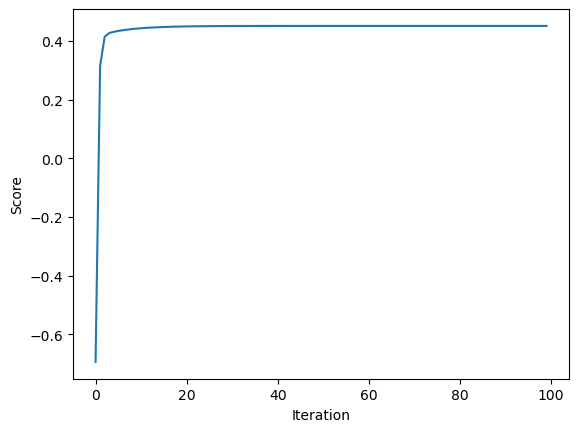

In [5]:
plt.plot(LR2.score_history)
labels = plt.gca().set(xlabel = "Iteration", ylabel = "Score")

# Increasing p_features

Below, we will perform an experiment in which p_features, the number of features used, will increase, while holding n_train, the number of training points, constant.

ValueError: x and y must be the same size

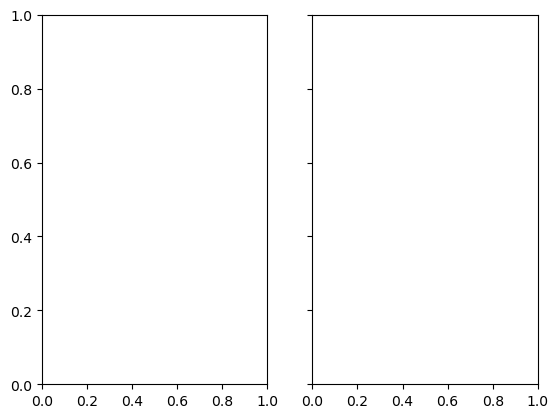

In [6]:
ex_n_train = 100
ex_n_val = 100
ex_p_features = n_train - 1
ex_noise = 0.2

# create some data
ex_X_train, ex_y_train, ex_X_val, ex_y_val = LR_data(ex_n_train, ex_n_val, ex_p_features, ex_noise)

# plot it
fig, axarr = plt.subplots(1, 2, sharex = True, sharey = True)
axarr[0].scatter(ex_X_train, ex_y_train)
axarr[1].scatter(ex_X_val, ex_y_val)
print(ex_X_train.shape)
print(ex_y_train.shape)
labs = axarr[0].set(title = "Training", xlabel = "x", ylabel = "y")
labs = axarr[1].set(title = "Validation", xlabel = "x")
plt.tight_layout()